# Classification with the Iris Dataset

Iris dataset is the most common dataset used inteaching machine learning. 

In [1]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns

In [2]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

In [3]:
# Load the iris data set from a URL.
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [4]:
# See the data 
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
# Summary statistics.
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


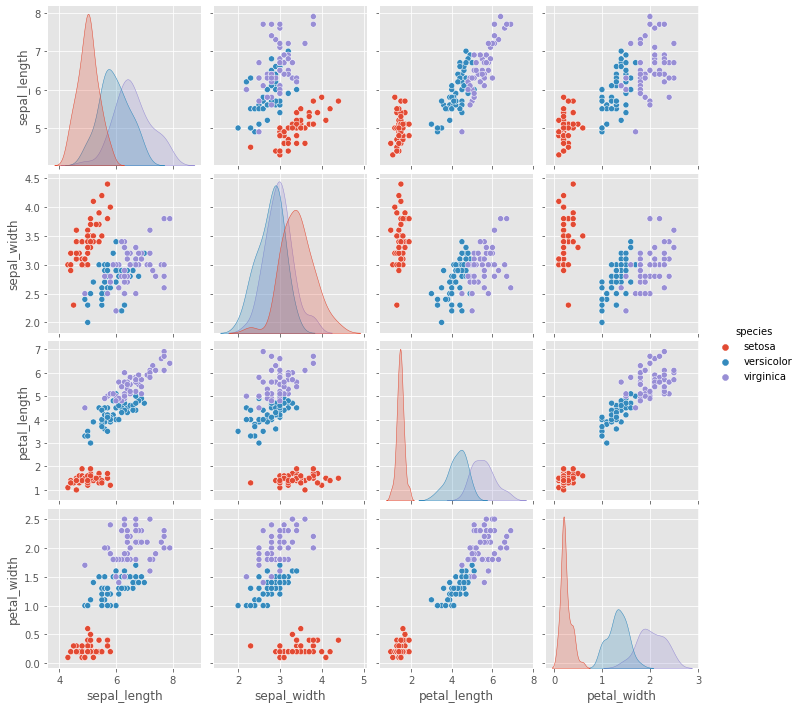

In [6]:
# Sacatter plot and kdes
sns.pairplot(df, hue="species");

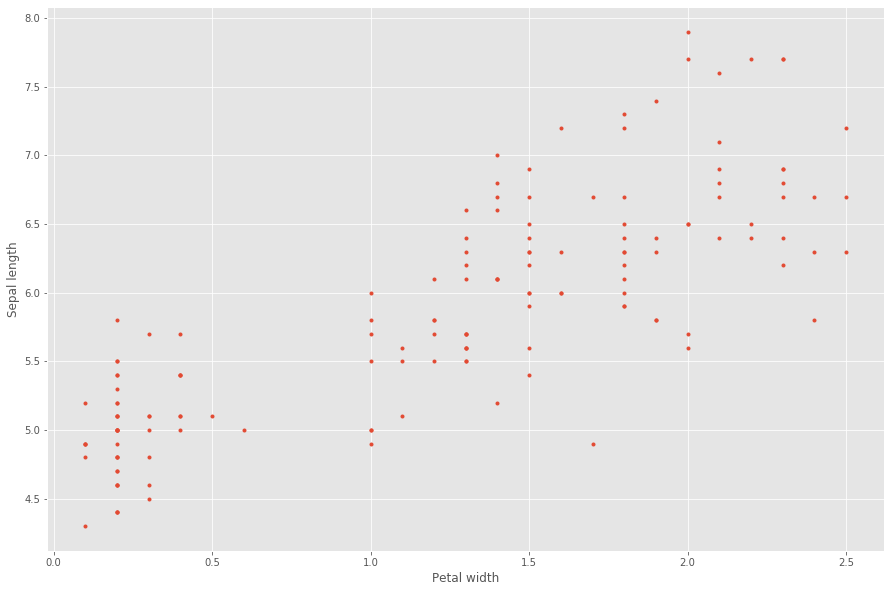

In [7]:
# New figure.
# learn about ax fig
# https://towardsdatascience.com/clearing-the-confusion-once-and-for-all-fig-ax-plt-subplots-b122bb7783ca
fig, ax = plt.subplots()

# Scatter plot.
ax.plot(df['petal_width'], df['sepal_length'], '.')

# Set axis labels.
ax.set_xlabel('Petal width');
ax.set_ylabel('Sepal length');

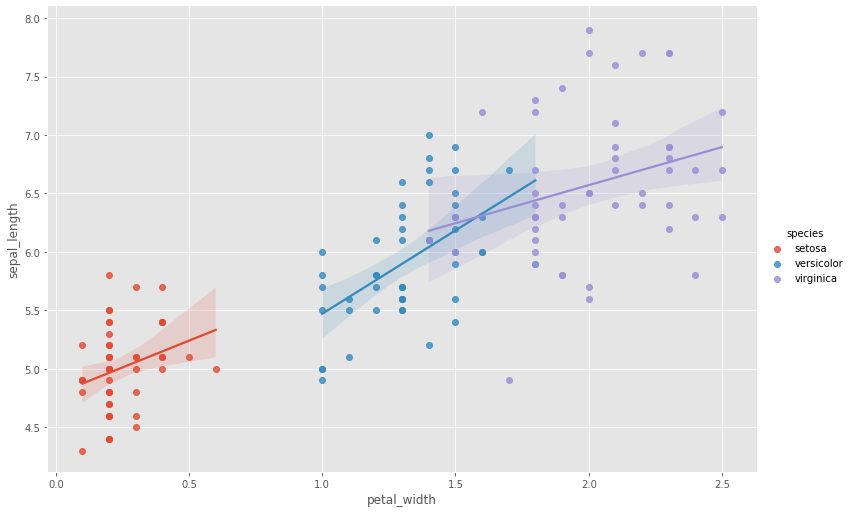

In [8]:
# Seaborn is great for creating plots with one command
sns.lmplot(x = "petal_width", y = "sepal_length", hue = 'species', data = df, fit_reg=True, height =7, aspect = 1.5);

### Pyplot

Using pyplot to get the same data as the above sns output

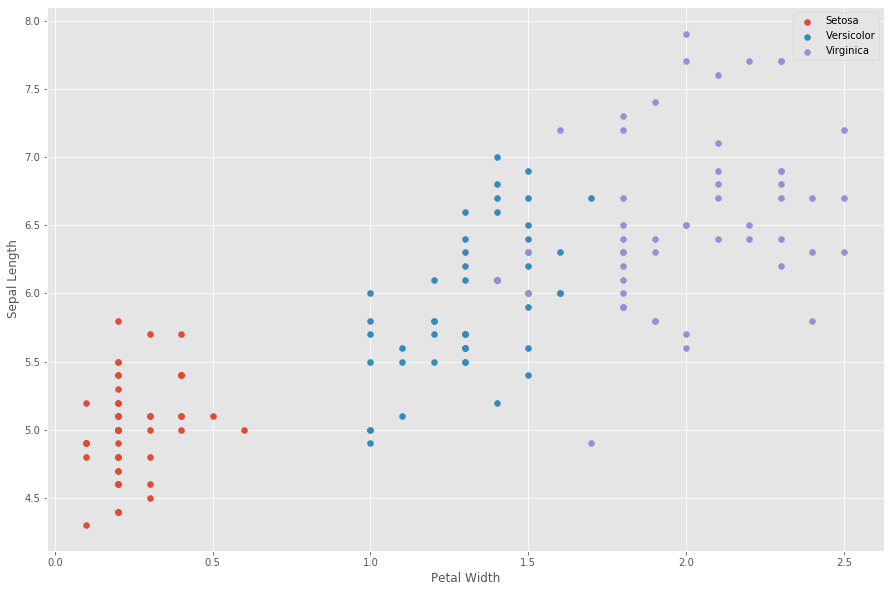

In [9]:
# Segregate the data.
setos = df[df['species'] == 'setosa']
versi = df[df['species'] == 'versicolor']
virgi = df[df['species'] == 'virginica']

# new plot
fig, ax = plt.subplots()

ax.scatter(setos['petal_width'], setos['sepal_length'], label= "Setosa");
ax.scatter(versi['petal_width'], versi['sepal_length'], label= "Versicolor")
ax.scatter(virgi['petal_width'], virgi['sepal_length'], label= "Virginica")

# legend
ax.set_xlabel('Petal Width')
ax.set_ylabel('Sepal Length')
ax.legend();

### Using groupby



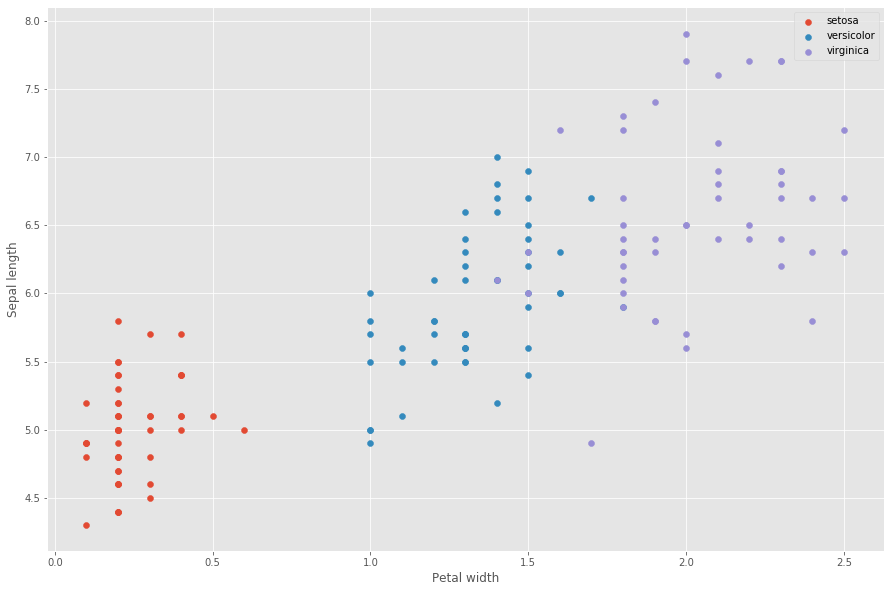

In [10]:
# now plot
fig, ax= plt.subplots()

# using pandas groupby
for species, data in df.groupby('species'):
    ax.scatter(data['petal_width'], data['sepal_length'], label= species)


# Show the legend
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

In [11]:
# Groupby typically takes a categorical variable. Here we see x is a dataframmegroupby object
x = df.groupby('species')
x

In [12]:
# Looping through groupby(). i is group by value, j are the values associated with this.
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j looks like:\n{j[:3]}")
    print()


i is: 'setosa'
j looks like:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa


i is: 'versicolor'
j looks like:
    sepal_length  sepal_width  petal_length  petal_width     species
50           7.0          3.2           4.7          1.4  versicolor
51           6.4          3.2           4.5          1.5  versicolor
52           6.9          3.1           4.9          1.5  versicolor


i is: 'virginica'
j looks like:
     sepal_length  sepal_width  petal_length  petal_width    species
100           6.3          3.3           6.0          2.5  virginica
101           5.8          2.7           5.1          1.9  virginica
102           7.1          3.0           5.9          2.1  virginica



### Train Test Split

In [13]:
# Split the data frame in two.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# takes array df as argument
train, test = mod.train_test_split(df)

In [14]:
# Show some training data.
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
137,6.4,3.1,5.5,1.8,virginica
147,6.5,3.0,5.2,2.0,virginica
138,6.0,3.0,4.8,1.8,virginica
32,5.2,4.1,1.5,0.1,setosa


In [15]:
test.index.size

38

In [16]:
train.index.size

112

### Two Dimensions: Inputs and outputs


In [17]:
# Give the inputs and outputs convenient names.
inputs, outputs = train[['sepal_length', 'petal_width']], train['species']

### Two Dimensions: Logistic regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [18]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

C:\Users\James\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\James\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['sepal_length', 'petal_width']])
predictions

array(['setosa', 'setosa', 'virginica', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'virginica', 'virginica', 'virginica', 'versicolor',
       'setosa', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'virginica',
       'virginica', 'setosa', 'versicolor'], dtype=object)

In [20]:
# Eyeball the misclassifications.
predictions == test['species']

17      True
16      True
109     True
12      True
64      True
110     True
80      True
44      True
54     False
88      True
33      True
148     True
113     True
143     True
98      True
41      True
122     True
123     True
99      True
31      True
63      True
50      True
5       True
117     True
19      True
104     True
119     True
1       True
69      True
120     True
89      True
11      True
91      True
24      True
106     True
68     False
30      True
90      True
Name: species, dtype: bool

In [21]:
# What proportion were correct?
lre.score(test[['sepal_length', 'petal_width']], test['species'])

0.9473684210526315

### Using Different Classifiers

Different scikit learn modules:
https://scikit-learn.org/stable/modules/classes.html


In [22]:
# Append a column to the test data frame with the predictions.
test['predicted'] = predictions
test.head()

C:\Users\James\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sepal_length,sepal_width,petal_length,petal_width,species,predicted
17,5.1,3.5,1.4,0.3,setosa,setosa
16,5.4,3.9,1.3,0.4,setosa,setosa
109,7.2,3.6,6.1,2.5,virginica,virginica
12,4.8,3.0,1.4,0.1,setosa,setosa
64,5.6,2.9,3.6,1.3,versicolor,versicolor


In [23]:
# Show the misclassified data.
misclass = test[test['predicted'] != test['species']]
misclass

,sepal_length,sepal_width,petal_length,petal_width,species,predicted
54,6.5,2.8,4.6,1.5,versicolor,virginica
68,6.2,2.2,4.5,1.5,versicolor,virginica


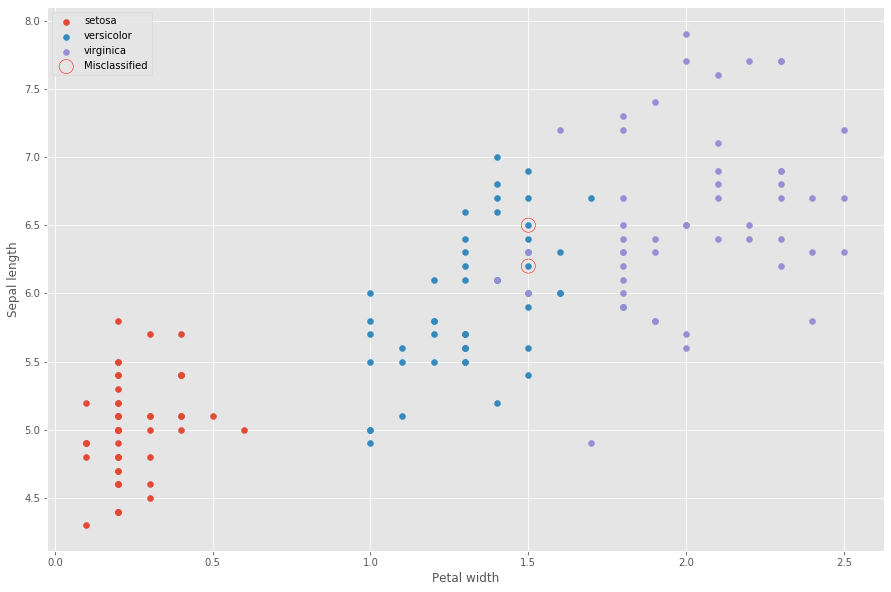

In [24]:
# New plot.
fig, ax = plt.subplots()

# Plot the training data
for species, data in df.groupby('species'):
    ax.scatter(data['petal_width'], data['sepal_length'], label=species)
    
# Plot misclassified.
ax.scatter(misclass['petal_width'], misclass['sepal_length'], s=200, facecolor='none', edgecolor='r', label='Misclassified')

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

### Separating Setosa

From [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression):


$ℓ=logbp1−p=β0+β1x1+β2x2$


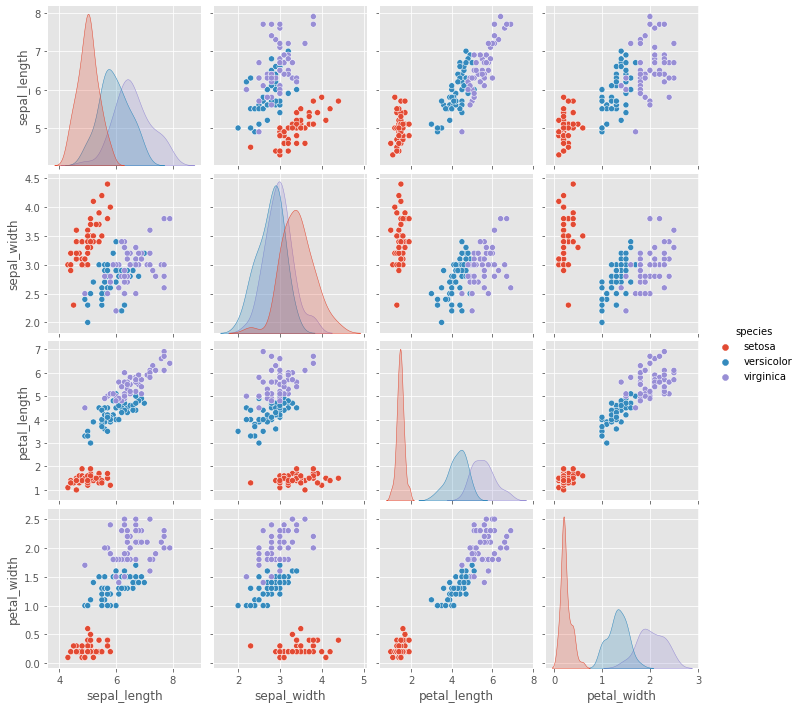

In [27]:
# Another look at this plot.
sns.pairplot(df, hue='species');

In [28]:
# Give the inputs and outputs convenient names.
inputs = train[['sepal_length', 'petal_width']]

# Set 'versicolor' and 'virginica' to 'other'.
outputs = train['species'].apply(lambda x: x if x == 'setosa' else 'other')

# Eyeball outputs
outputs.unique()

array(['setosa', 'other'], dtype=object)

In [29]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

C:\Users\James\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
actual = test['species'].apply(lambda x: x if x == 'setosa' else 'other')

# What proportion were correct?
lre.score(test[['sepal_length', 'petal_width']], actual)

1.0

### Using All Possible Inputs

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [31]:
# Load the iris data set from a URL.
df2 = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [32]:
# Split the data frame in two.
train, test = mod.train_test_split(df2)

In [33]:
# Use all four possible inputs.
inputs, outputs = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['species']

In [34]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

C:\Users\James\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\James\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
predictions

array(['versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica',
       'versicolor', 'setosa', 'virginica', 'virginica', 'setosa',
       'setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor'], dtype=object)

In [36]:
# Eyeball the misclassifications.
(predictions == test['species']).value_counts()

True     33
False     5
Name: species, dtype: int64

In [37]:
# What proportion were correct?
lre.score(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], test['species'])

0.868421052631579

### $k$ Nearest Neighbours Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [38]:
# Load the iris data set from a URL.
df3 = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [40]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [41]:
# Use all four possible inputs.
inputs, outputs = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['species']

In [42]:
# Classifier.
knn = nei.KNeighborsClassifier()

In [43]:
# Fit.
knn.fit(inputs, outputs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [44]:
# Test.
knn.score(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], test['species'])

1.0

In [45]:
# Predict.
predictions = lre.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
(predictions == test['species']).value_counts()

True     35
False     3
Name: species, dtype: int64

In [46]:
# The score is just the accuracy in this case.
(predictions == test['species']).value_counts(normalize=True)

True     0.921053
False    0.078947
Name: species, dtype: float64

In [47]:
# The score is just the accuracy in this case.
(predictions == test['species']).value_counts(normalize=True)

True     0.921053
False    0.078947
Name: species, dtype: float64

### Cross Validation

https://scikit-learn.org/stable/modules/cross_validation.html

In [54]:
knn = nei.KNeighborsClassifier()
scores = mod.cross_val_score(knn, df3[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], df3['species'])
scores

C:\Users\James\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.98039216, 0.98039216, 1.        ])

In [55]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

Mean: 0.9869281045751634 	 Standard Deviation: 0.009243225897863385


In [56]:
lre = lm.LogisticRegression(random_state=0)
scores = mod.cross_val_score(lre, df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], df['species'])
scores

C:\Users\James\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\James\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\James\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\James\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\James\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning

array([0.96078431, 0.92156863, 0.95833333])

In [51]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

Mean: 0.9468954248366014 	 Standard Deviation: 0.017936681699428268
